## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4            Y
0  88.456753   569.711751  0.674007   4.451750   394.004909
1  86.594106   143.952007  0.506939   4.254949   113.377388
2  18.702336   592.743788  0.945955  10.616276   561.157906
3   5.117222  1684.212766  0.792450  10.000813  1334.674309
4  97.377171  1658.372686  0.750823   7.339069  1248.779536


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9713941	total: 58.1ms	remaining: 58s
1:	learn: 0.9590318	total: 58.6ms	remaining: 29.2s
2:	learn: 0.9492056	total: 59.6ms	remaining: 19.8s
3:	learn: 0.9383760	total: 60ms	remaining: 15s
4:	learn: 0.9260010	total: 60.5ms	remaining: 12s
5:	learn: 0.9151450	total: 60.9ms	remaining: 10.1s
6:	learn: 0.9039085	total: 61.5ms	remaining: 8.73s
7:	learn: 0.8907107	total: 62.1ms	remaining: 7.7s
8:	learn: 0.8813030	total: 62.6ms	remaining: 6.89s
9:	learn: 0.8708631	total: 63ms	remaining: 6.24s
10:	learn: 0.8604266	total: 63.5ms	remaining: 5.71s
11:	learn: 0.8472870	total: 64ms	remaining: 5.27s
12:	learn: 0.8343207	total: 64.4ms	remaining: 4.89s
13:	learn: 0.8232955	total: 64.9ms	remaining: 4.57s
14:	learn: 0.8126898	total: 65.6ms	remaining: 4.3s
15:	learn: 0.8017129	total: 66.1ms	remaining: 4.07s
16:	learn: 0.7909545	total: 66.8ms	remaining: 3.86s
17:	learn: 0.7828255	total: 67.2ms	remaining: 3.66s
18:	learn: 0.7748734	total: 67.5ms	remaining: 3.49s
19:	le

66:	learn: 0.4384065	total: 90.2ms	remaining: 1.26s
67:	learn: 0.4352153	total: 90.9ms	remaining: 1.25s
68:	learn: 0.4290696	total: 91.3ms	remaining: 1.23s
69:	learn: 0.4226734	total: 91.7ms	remaining: 1.22s
70:	learn: 0.4175195	total: 92.2ms	remaining: 1.21s
71:	learn: 0.4138944	total: 92.6ms	remaining: 1.19s
72:	learn: 0.4099700	total: 93ms	remaining: 1.18s
73:	learn: 0.4055949	total: 93.5ms	remaining: 1.17s
74:	learn: 0.4010749	total: 94ms	remaining: 1.16s
75:	learn: 0.3966234	total: 94.4ms	remaining: 1.15s
76:	learn: 0.3916935	total: 94.7ms	remaining: 1.14s
77:	learn: 0.3867836	total: 95.2ms	remaining: 1.12s
78:	learn: 0.3823532	total: 95.6ms	remaining: 1.11s
79:	learn: 0.3775880	total: 96.1ms	remaining: 1.1s
80:	learn: 0.3733168	total: 96.6ms	remaining: 1.1s
81:	learn: 0.3689013	total: 97.1ms	remaining: 1.09s
82:	learn: 0.3646946	total: 97.5ms	remaining: 1.08s
83:	learn: 0.3606680	total: 97.9ms	remaining: 1.07s
84:	learn: 0.3570820	total: 98.4ms	remaining: 1.06s
85:	learn: 0.35374

236:	learn: 0.1002328	total: 168ms	remaining: 542ms
237:	learn: 0.0995440	total: 169ms	remaining: 541ms
238:	learn: 0.0991942	total: 169ms	remaining: 539ms
239:	learn: 0.0988253	total: 170ms	remaining: 538ms
240:	learn: 0.0980414	total: 170ms	remaining: 536ms
241:	learn: 0.0977327	total: 171ms	remaining: 535ms
242:	learn: 0.0974104	total: 171ms	remaining: 533ms
243:	learn: 0.0970969	total: 172ms	remaining: 532ms
244:	learn: 0.0963137	total: 172ms	remaining: 530ms
245:	learn: 0.0956986	total: 173ms	remaining: 529ms
246:	learn: 0.0949875	total: 173ms	remaining: 527ms
247:	learn: 0.0946570	total: 173ms	remaining: 525ms
248:	learn: 0.0940204	total: 174ms	remaining: 524ms
249:	learn: 0.0933786	total: 174ms	remaining: 523ms
250:	learn: 0.0929435	total: 174ms	remaining: 521ms
251:	learn: 0.0923039	total: 175ms	remaining: 520ms
252:	learn: 0.0920557	total: 175ms	remaining: 518ms
253:	learn: 0.0918251	total: 176ms	remaining: 516ms
254:	learn: 0.0915869	total: 176ms	remaining: 513ms
255:	learn: 

514:	learn: 0.0324719	total: 271ms	remaining: 255ms
515:	learn: 0.0322870	total: 272ms	remaining: 255ms
516:	learn: 0.0321149	total: 272ms	remaining: 254ms
517:	learn: 0.0319350	total: 273ms	remaining: 254ms
518:	learn: 0.0317675	total: 273ms	remaining: 253ms
519:	learn: 0.0315926	total: 274ms	remaining: 253ms
520:	learn: 0.0314295	total: 274ms	remaining: 252ms
521:	learn: 0.0312593	total: 274ms	remaining: 251ms
522:	learn: 0.0311005	total: 275ms	remaining: 250ms
523:	learn: 0.0309349	total: 275ms	remaining: 250ms
524:	learn: 0.0307803	total: 276ms	remaining: 249ms
525:	learn: 0.0306071	total: 276ms	remaining: 249ms
526:	learn: 0.0304234	total: 276ms	remaining: 248ms
527:	learn: 0.0302660	total: 277ms	remaining: 247ms
528:	learn: 0.0301114	total: 277ms	remaining: 247ms
529:	learn: 0.0299344	total: 278ms	remaining: 246ms
530:	learn: 0.0297732	total: 278ms	remaining: 246ms
531:	learn: 0.0296248	total: 278ms	remaining: 245ms
532:	learn: 0.0294547	total: 279ms	remaining: 244ms
533:	learn: 

690:	learn: 0.0164189	total: 349ms	remaining: 156ms
691:	learn: 0.0163796	total: 349ms	remaining: 155ms
692:	learn: 0.0162880	total: 350ms	remaining: 155ms
693:	learn: 0.0162545	total: 350ms	remaining: 154ms
694:	learn: 0.0162216	total: 351ms	remaining: 154ms
695:	learn: 0.0161891	total: 351ms	remaining: 153ms
696:	learn: 0.0161518	total: 352ms	remaining: 153ms
697:	learn: 0.0160630	total: 352ms	remaining: 152ms
698:	learn: 0.0160317	total: 352ms	remaining: 152ms
699:	learn: 0.0160005	total: 353ms	remaining: 151ms
700:	learn: 0.0159477	total: 353ms	remaining: 151ms
701:	learn: 0.0158729	total: 354ms	remaining: 150ms
702:	learn: 0.0158474	total: 354ms	remaining: 150ms
703:	learn: 0.0158065	total: 355ms	remaining: 149ms
704:	learn: 0.0157338	total: 355ms	remaining: 149ms
705:	learn: 0.0157012	total: 356ms	remaining: 148ms
706:	learn: 0.0156499	total: 356ms	remaining: 148ms
707:	learn: 0.0155795	total: 357ms	remaining: 147ms
708:	learn: 0.0155528	total: 357ms	remaining: 146ms
709:	learn: 

935:	learn: 0.0070206	total: 453ms	remaining: 31ms
936:	learn: 0.0069953	total: 454ms	remaining: 30.5ms
937:	learn: 0.0069654	total: 454ms	remaining: 30ms
938:	learn: 0.0069366	total: 455ms	remaining: 29.5ms
939:	learn: 0.0069248	total: 455ms	remaining: 29ms
940:	learn: 0.0069019	total: 455ms	remaining: 28.5ms
941:	learn: 0.0068756	total: 456ms	remaining: 28.1ms
942:	learn: 0.0068692	total: 456ms	remaining: 27.6ms
943:	learn: 0.0068507	total: 456ms	remaining: 27.1ms
944:	learn: 0.0068337	total: 457ms	remaining: 26.6ms
945:	learn: 0.0068169	total: 457ms	remaining: 26.1ms
946:	learn: 0.0067924	total: 458ms	remaining: 25.6ms
947:	learn: 0.0067603	total: 458ms	remaining: 25.1ms
948:	learn: 0.0067294	total: 459ms	remaining: 24.6ms
949:	learn: 0.0067117	total: 459ms	remaining: 24.2ms
950:	learn: 0.0066954	total: 460ms	remaining: 23.7ms
951:	learn: 0.0066643	total: 460ms	remaining: 23.2ms
952:	learn: 0.0066484	total: 460ms	remaining: 22.7ms
953:	learn: 0.0066209	total: 461ms	remaining: 22.2ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

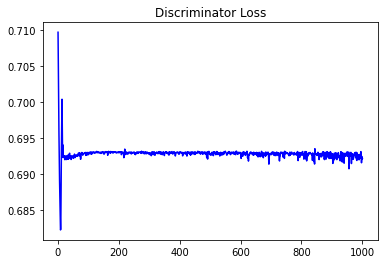

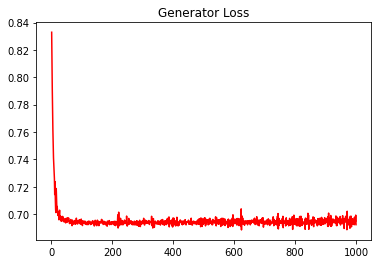

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.01124187930935455


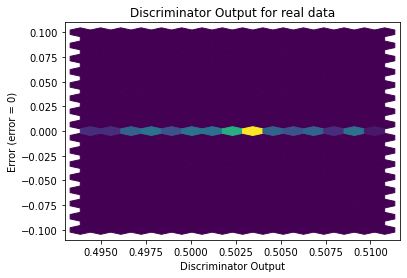

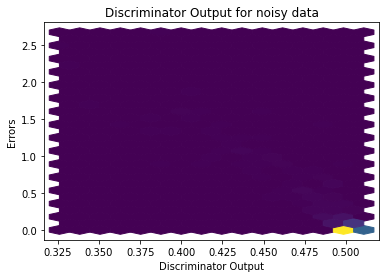

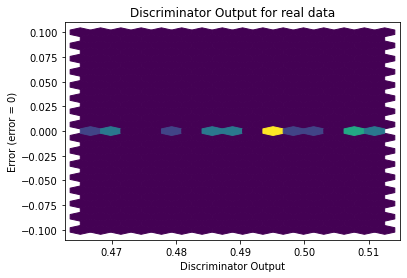

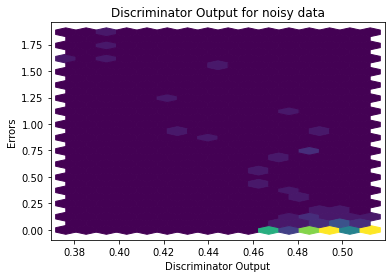

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


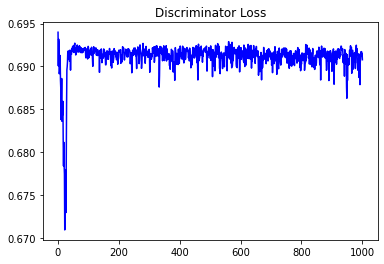

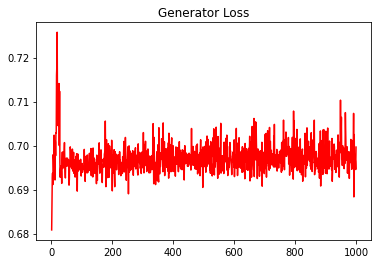

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.005038243337550075


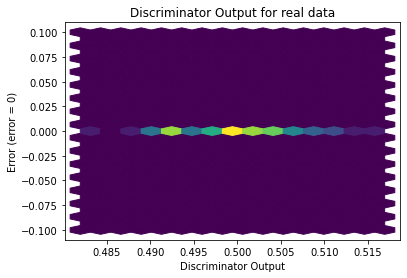

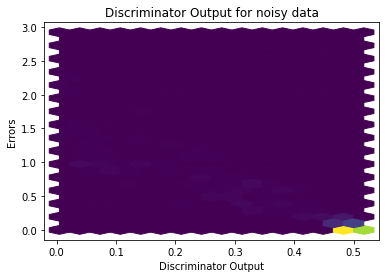

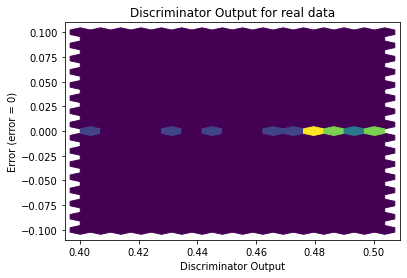

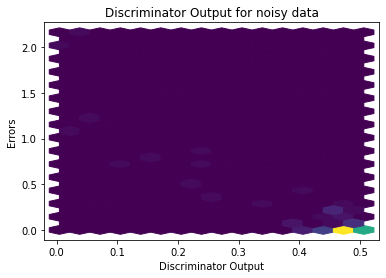

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.3846]], requires_grad=True)
